# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.
    
    Set alpha = 0.05

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
from __future__  import print_function
from scipy import stats
import os
import datetime as dt
#import for location process

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [15]:
#download file of 2 months.
getCitiBikeCSV('201501')

file in place, you can continue


In [16]:
getCitiBikeCSV('201503')

file in place, you can continue


In [17]:
DF1 = pd.read_csv(os.getenv("PUIDATA") + "/" + '201501' + '-citibike-tripdata.csv')
DF2 = pd.read_csv(os.getenv("PUIDATA") + "/" + '201503' + '-citibike-tripdata.csv')

In [96]:
df = pd.concat([DF1, DF2], join='inner', ignore_index=True)

In [97]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [20]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

## Question 1: trip duration of bikers that ride during the day vs night

In [21]:
df['time'] = df['date'].apply(lambda x : x.time())

In [24]:
# define daytime as 5am - 7pm, and night time as 7am to 5am on next day.
time1 = dt.datetime.strptime('05:00:00.000-0000','%H:%M:%S.%f%z').time()
time2 = dt.datetime.strptime('19:00:00.000-0000','%H:%M:%S.%f%z').time()
def time_checker(t):
    if t < time1:
        return 'Night'
    elif t > time2:
        return 'Night'
    else:
        return 'Day'

In [25]:
df['type'] = df['time'].apply(lambda x: time_checker(x))

In [26]:
df2 = df[['tripduration','type']]
df2.head()

,tripduration,type
0,1346,Night
1,363,Night
2,346,Night
3,182,Night
4,969,Night


In [27]:
df3 = df2.pivot(columns='type', values='tripduration')
df3.Night.dropna(inplace=True)
df3.Day.dropna(inplace=True)
df3.head()

type,Day,Night
0,NaN,1346.0
1,NaN,363.0
2,NaN,346.0
3,NaN,182.0
4,NaN,969.0


In [28]:
df3.describe()

type,Day,Night
count,514720.000000,1.126580e+05
mean,701.441850,6.817657e+02
std,1795.811145,3.942780e+03
min,60.000000,6.000000e+01
25%,348.000000,3.250000e+02
50%,527.000000,4.980000e+02
75%,818.000000,7.720000e+02
max,352110.000000,1.007614e+06


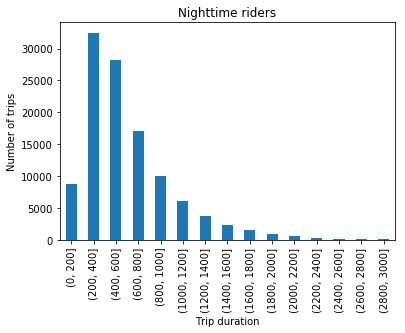

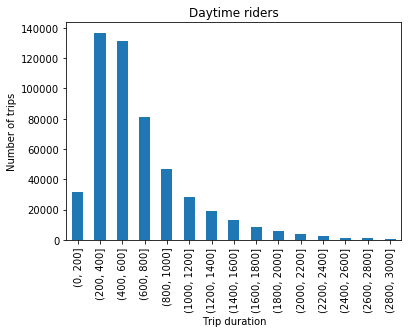

In [169]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0, 3200, 200)
axN = df3.Night.groupby(pd.cut(df3.Night, bins)).agg('count').plot(kind='bar', 
                                                                legend=False)
axN.set_title("Nighttime riders")
axN.set_xlabel("Trip duration")
axN.set_ylabel("Number of trips")
plt.show()
axD = df3.Day.groupby(pd.cut(df3.Day, bins)).agg('count').plot(kind='bar',
                                                                legend=False)
axD.set_title("Daytime riders");
axD.set_xlabel("Trip duration")
axD.set_ylabel("Number of trips")
plt.show()

Day
(0, 200]        0.015514
(200, 400]      0.037528
(400, 600]      0.032701
(600, 800]      0.025174
(800, 1000]     0.022223
(1000, 1200]    0.020369
(1200, 1400]    0.016474
(1400, 1600]    0.011455
(1600, 1800]    0.007845
(1800, 2000]    0.005583
(2000, 2200]    0.003857
(2200, 2400]    0.002355
(2400, 2600]    0.001214
(2600, 2800]    0.000415
(2800, 3000]    0.000000
dtype: float64


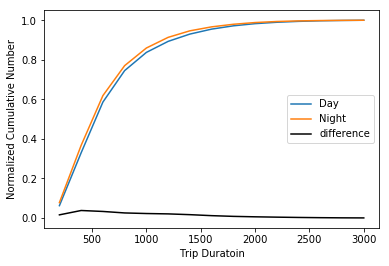

In [43]:
csD=df3.Day.groupby(pd.cut(df3.Day, bins)).agg('count').cumsum()

csN=df3.Night.groupby(pd.cut(df3.Night, bins)).agg('count').cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

plt.plot(bins[:-1] + 200, csD / csD.max(), label = "Day")
plt.plot(bins[:-1] + 200, csN / csN.max(), label = "Night")
plt.plot(bins[:-1] + 200, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
plt.xlabel("Trip Duratoin")
plt.ylabel("Normalized Cumulative Number")
plt.legend()

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [45]:
import scipy.stats

In [46]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function
ks1 = scipy.stats.ks_2samp(df3.Day, df3.Night)
print (ks1)

Ks_2sampResult(statistic=0.03979829370907001, pvalue=1.0999006550463452e-127)


#### Null hypothesis: The trip durations of bikers that ride during the day vs night have no difference.
#### The KS test returned:
#### statistic=0.03979829370907001, which is the ks test statistic. 
#### pvalue: 1.0999006550463452e-127, which is the probability of finding the observed, or more extreme, results when the null hypothesis is true. 
#### Since pvalue < alpha, we can reject null hypothesis.
#### We can conclude that the trip durations of daytime and nighttime riders are different.

In [51]:
df4 = df3.sample(frac=0.005, replace=True)
ks2 = stats.ks_2samp(df4.Day,df4.Night)
print (ks2)

Ks_2sampResult(statistic=0.6455211985973861, pvalue=0.0)


#### Null hypothesis: The trip durations of bikers that ride during the day vs night have no difference.
#### The KS test returned:
#### statistic=0.6455211985973861, which is the ks test statistic. 
#### pvalue: 0.0, which is the probability of finding the observed, or more extreme, results when the null hypothesis is true. 
#### Since pvalue < alpha, we can reject null hypothesis.
#### We can conclude that the trip durations of daytime and nighttime riders are different.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [54]:
#random selecting 10000 observations from two datasets, ensure they can be paired up.
d = np.random.choice(df3.Day, 10000)
d.sort()
n = np.random.choice(df3.Night, 10000)
n.sort()

In [55]:
stats.pearsonr(d, n)

(0.70486818699982146, 0.0)

#### Null hypothesis: The trip durations of bikers that ride during the day vs night have no correlation.
#### Pearson's correlation coefficient = 0.70486818699982146.
#### The Pearson's test returned pvalue: 0.0. Since pvalue < alpha, we can reject null hypothesis.
#### We can conclude that there is positive correlation between day and night trip durations.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [56]:
stats.spearmanr(d, n)

SpearmanrResult(correlation=0.99999862392203831, pvalue=0.0)

#### Null hypothesis: The trip durations of bikers that ride during the day vs night have no correlation.
#### Spearman's correlation coefficient = 0.99999862392203831
#### The Spearman's test returned pvalue: 0.0. Since pvalue < alpha, we can reject null hypothesis.
#### We can conclude that there is positive correlation between day and night trip durations.

## Question 2: age of bikers for trips originating in Manhattan and in Brooklyn

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627378 entries, 0 to 627377
Data columns (total 18 columns):
tripduration               627378 non-null int64
starttime                  627378 non-null object
stoptime                   627378 non-null object
start station id           627378 non-null int64
start station name         627378 non-null object
start station latitude     627378 non-null float64
start station longitude    627378 non-null float64
end station id             627378 non-null int64
end station name           627378 non-null object
end station latitude       627378 non-null float64
end station longitude      627378 non-null float64
bikeid                     627378 non-null int64
usertype                   627378 non-null object
birth year                 608897 non-null float64
gender                     627378 non-null int64
date                       627378 non-null datetime64[ns]
time                       627378 non-null object
type                       6273

In [99]:
from shapely.geometry import Point
list = []
for i in range(len(df)):
    loc = Point([df['start station longitude'][i],df['start station latitude'][i]])
    list.append(loc)

df['location'] = pd.Series(list)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,location
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,POINT (-73.96905301 40.75001986)
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,POINT (-74.00366443 40.74317449)
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,POINT (-73.98602212999999 40.74096374)
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,POINT (-73.96596409999999 40.68317813)
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,POINT (-73.98683077 40.7451677)


In [152]:
df5 = df[['location', 'birth year']]

In [72]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627378 entries, 0 to 627377
Data columns (total 2 columns):
location      627378 non-null object
birth year    608897 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.6+ MB


In [153]:
df5.dropna(inplace=True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608897 entries, 0 to 627377
Data columns (total 2 columns):
location      608897 non-null object
birth year    608897 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.9+ MB


/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
#the data is too big for my kernel to run, I select a part of it.
df5 = df5.sample(frac=0.002, replace=True)

In [184]:
df5.count()

location      1218
birth year    1218
age           1218
dtype: int64

In [155]:
df5['age'] = 2017 - df5['birth year']

In [130]:
df5.head()

,location,birth year,age
91724,POINT (-73.99093085 40.75019995),1991.0,26.0
207874,POINT (-74.00263760999999 40.73901691),1991.0,26.0
302328,POINT (-73.97768752 40.72521311),1971.0,46.0
180069,POINT (-74.00443172 40.74206539),1984.0,33.0
299262,POINT (-73.98915076 40.7423543),1961.0,56.0


In [156]:
import geopandas as gpd

In [192]:
os.system("curl -O https://raw.githubusercontent.com/baolingz/gittest_baolingz/master/BoroughBoundaries.geojson")
os.system("mv " + "BoroughBoundaries.geojson " + os.getenv("PUIDATA"))

0

In [193]:
mp = gpd.read_file(os.getenv("PUIDATA") + "/" + "BoroughBoundaries.geojson")
mp

,boro_name,boro_code,shape_leng,shape_area,geometry
0,Staten Island,5,330437.103648,1623914222.74,(POLYGON ((-74.05050806403247 40.5664220341608...
1,Bronx,2,464365.63867,1186678192.09,(POLYGON ((-73.89680883223774 40.7958084451597...
2,Queens,4,895720.956401,3044779902.31,(POLYGON ((-73.83668274106707 40.5949466970158...
3,Brooklyn,3,741077.854437,1937477754.43,(POLYGON ((-73.86706149472118 40.5820879767934...
4,Manhattan,1,361050.577478,636479884.362,(POLYGON ((-74.01092841268031 40.6844914725429...


In [165]:
BK = pd.DataFrame()
MN = pd.DataFrame()
for loc in df5['location']:
    if mp['geometry'][3].contains(loc):
        BK = BK.append(df5[df5['location']==loc])
for loc in df5['location']:
    if mp['geometry'][4].contains(loc):
        MN = MN.append(df5[df5['location']==loc])

In [166]:
BK.head()

,location,birth year,age
514199,POINT (-73.97895137 40.68312489),1980.0,37.0
40537,POINT (-73.97895137 40.68312489),1986.0,31.0
313753,POINT (-73.97895137 40.68312489),1962.0,55.0
375875,POINT (-73.97895137 40.68312489),1992.0,25.0
381692,POINT (-73.97178913 40.69308257),1972.0,45.0


In [167]:
MN.head()

,location,birth year,age
345629,POINT (-73.99098506999999 40.75756989999999),1972.0,45.0
595874,POINT (-73.99098506999999 40.75756989999999),1988.0,29.0
176930,POINT (-73.99098506999999 40.75756989999999),1956.0,61.0
48706,POINT (-73.99098506999999 40.75756989999999),1986.0,31.0
607652,POINT (-73.99098506999999 40.75756989999999),1977.0,40.0


In [174]:
MN.describe()

,birth year,age
count,7702.000000,7702.000000
mean,1974.215918,42.784082
std,11.496187,11.496187
min,1940.000000,20.000000
25%,1966.000000,34.000000
50%,1976.000000,41.000000
75%,1983.000000,51.000000
max,1997.000000,77.000000


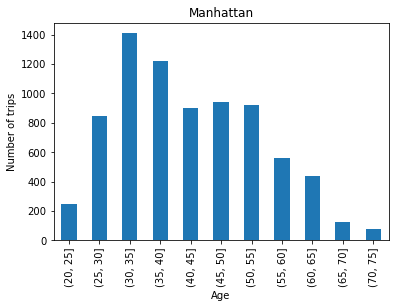

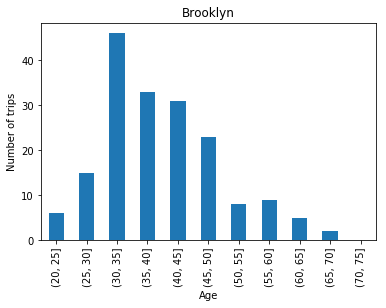

In [177]:
bins = np.arange(20, 80, 5)
axMN = MN.age.groupby(pd.cut(MN.age, bins)).agg('count').plot(kind='bar', legend=False)
axMN.set_xlabel("Age")
axMN.set_ylabel("Number of trips")
axMN.set_title("Manhattan")
plt.show()
axBK = BK.age.groupby(pd.cut(BK.age, bins)).agg('count').plot(kind='bar', legend=False)
axBK.set_xlabel("Age")
axBK.set_ylabel("Number of trips")
axBK.set_title("Brooklyn")
plt.show()

age
(20, 25]    0.001811
(25, 30]    0.024191
(30, 35]    0.050666
(35, 40]    0.077225
(40, 45]    0.133950
(45, 50]    0.140654
(50, 55]    0.065300
(55, 60]    0.043215
(60, 65]    0.014542
(65, 70]    0.009895
(70, 75]    0.000000
Name: age, dtype: float64


/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


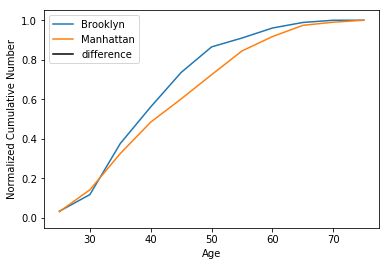

In [191]:
csB=BK.age.groupby(pd.cut(BK.age, bins)).agg('count').cumsum()

csM=MN.age.groupby(pd.cut(MN.age, bins)).agg('count').cumsum()

print (np.abs(csB / csB.max()-csM / csM.max()))

plt.plot(bins[:-1] + 5, csB / csB.max(), label = "Brooklyn")
plt.plot(bins[:-1] + 5, csM / csM.max(), label = "Manhattan")
plt.plot(bins[:-1] + 5, np.sqrt(csM / csM.max() - csB / csB.max())**2, 'k-',
        label = "difference")
plt.xlabel("Age")
plt.ylabel("Normalized Cumulative Number")
plt.legend()

## KS tests to compare 2 samples

In [178]:
ks3 = stats.ks_2samp(MN.age, BK.age)
print (ks3)

Ks_2sampResult(statistic=0.14140497579791034, pvalue=0.0016607918915297363)


#### Null hypothesis: The age of bikers that ride originating in Manhattan and in Brooklyn have no difference.
#### The KS test returned:
#### statistic=0.14140497579791034, which is the ks test statistic. 
#### pvalue: 0.0016607918915297363, which is the probability of finding the observed, or more extreme, results when the null hypothesis is true. 
#### Since pvalue < alpha, we can reject null hypothesis.
#### The age of bikers that ride originating in Manhattan and in Brooklyn are different.

In [180]:
#with smaller sample
m = MN.sample(frac=0.005, replace=True)
b = BK.sample(frac=0.005, replace=True)

ks4 = stats.ks_2samp(m.age, b.age)
print (ks4)

Ks_2sampResult(statistic=0.94871794871794868, pvalue=0.13788629449588277)


#### Null hypothesis: The age of bikers that ride originating in Manhattan and in Brooklyn have no difference.
#### The KS test returned:
#### statistic=0.94871794871794868, which is the ks test statistic. 
#### pvalue: 0.13788629449588277, which is the probability of finding the observed, or more extreme, results when the null hypothesis is true. 
#### Since pvalue > alpha, we cannot reject null hypothesis.
#### The age of bikers that ride originating in Manhattan and in Brooklyn are the same.

## Pearson's test for correlation

In [198]:
print (MN.count())
print (BK.count())

location      7702
birth year    7702
age           7702
dtype: int64
location      178
birth year    178
age           178
dtype: int64


In [194]:
#need paired data
M = np.random.choice(MN.age, 178)
M.sort()
B = np.random.choice(BK.age, 178)
B.sort()

In [195]:
stats.pearsonr(M, B)

(0.98289900834421995, 2.8464182783577585e-131)

#### Null hypothesis: The age of bikers that ride originating in Manhattan and in Brooklyn have no correlation.
#### Pearson's correlation coefficient = 0.98802750835758391.
#### The Pearson's test returned pvalue: 2.8464182783577585e-131. Since pvalue < alpha, we can reject null hypothesis.
#### We can conclude that there is positive correlation between Manhattan and Brooklyn regarding riders' age.

## Spearman's test for correlation

In [196]:
stats.spearmanr(M, B)

SpearmanrResult(correlation=0.99806893686243336, pvalue=2.4166163675907404e-214)

#### Null hypothesis: The age of bikers that ride originating in Manhattan and in Brooklyn have no correlation.
#### Spearman's correlation coefficient = 0.99818394251453435.
#### The Spearman's test returned pvalue: 2.4166163675907404e-214. Since pvalue < alpha, we can reject null hypothesis.
#### We can conclude that there is positive correlation between Manhattan and Brooklyn regarding riders' age.